## 可视化

### 常用代码

In [81]:
# 支持多行输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

In [95]:
# windows环境下中文的正常显示（Linux中不够的，需要修改字体后重新加载）
plt.rcParams['font.sans-serif']=['SimHei'] 
#用来正常坐标轴的数字的负号
plt.rcParams['axes.unicode_minus']=False

### 读取数据

In [45]:
import pandas as pd
import numpy as np
raw = pd.read_csv("data/国家十四五发展规划.txt", sep ='aaa' , encoding ="gbk", header = None)
# , encoding ="GB18030"

D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
raw.head()

,0
0,第一篇 开启全面建设社会主义现代化国家新征程
1,“十四五”时期是我国全面建成小康社会、实现第一个百年奋斗目标之后，乘势而上开启全面建设社会主...
2,第一章 发展环境
3,我国进入新发展阶段，发展基础更加坚实，发展条件深刻变化，进一步发展面临新的机遇和挑战。
4,第一节 决胜全面建成小康社会取得决定性成就


In [47]:
raw['test'] = 1
rawgrp = raw.groupby('test')
use_txt = rawgrp.agg(sum)

In [54]:
type(use_txt)
use_txt.shape
use_txt.columns
len(use_txt[0])

1

In [55]:
import jieba
#分词
word_list = jieba.lcut(use_txt.iloc[0, 0])
word_list[:10]

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\guiya\AppData\Local\Temp\jieba.cache
Loading model cost 0.587 seconds.
Prefix dict has been built successfully.


['第一篇', '\u3000', '开启', '全面', '建设', '社会主义', '现代化', '国家', '新', '征程']

### 使用Pandas统计

In [63]:
# 去除停用词
stoplist = list(pd.read_csv('data/停用词.txt', names = ['w'], sep = 'aaa', 
                            encoding = 'utf-8', engine='python').w)

In [64]:
def m_cut(intxt):
    return [ w for w in jieba.cut(intxt) 
            if w not in stoplist and len(w) > 1 ]

In [65]:
# 生成分词清理后章节文本
clean_txt = " ".join(m_cut(use_txt.iloc[0, 0]))

In [66]:
# 使用Pandas进行词频统计
word_list = jieba.lcut(clean_txt)

In [67]:
df = pd.DataFrame(word_list, columns = ['word'])
df.head(10)

,word
0,第一篇
1,
2,开启
3,
4,建设
5,
6,社会主义
7,
8,现代化
9,


In [68]:
result = df.groupby(['word']).size()
print(type(result))
freqlist = result.sort_values(ascending=False)

<class 'pandas.core.series.Series'>


word
      21629
发展      437
建设      334
完善      271
推进      242
体系      238
推动      171
健全      170
制度      167
国家      158
dtype: int64

In [100]:
freqlist[1:10]

word
发展    437
建设    334
完善    271
推进    242
体系    238
推动    171
健全    170
制度    167
国家    158
dtype: int64

In [ ]:
# word
# 发展    437
# 建设    334
# 完善    271
# 推进    242
# 体系    238
# 推动    171
# 健全    170
# 制度    167
# 国家    158
# dtype: int64

### 直方图

<Figure size 864x432 with 0 Axes>

<BarContainer object of 19 artists>

Text(0, 0.5, 'word')

Text(0.5, 0, 'frequency')

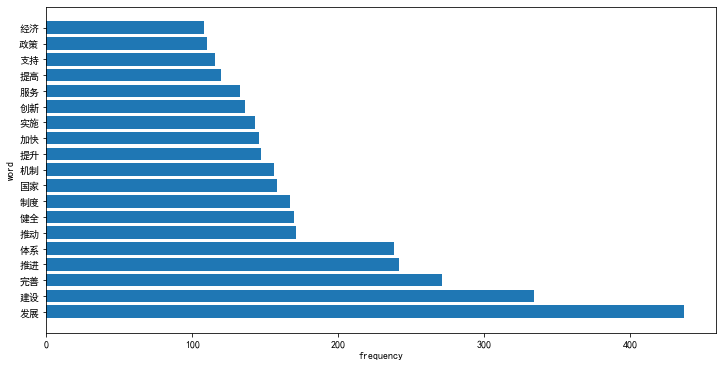

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 6))
plt.barh(freqlist.index[1: 20], freqlist[1:20])
plt.ylabel('word')
plt.xlabel('frequency')
plt.show()

In [88]:
freqlist.index[1: 20]

Index(['发展', '建设', '完善', '推进', '体系', '推动', '健全', '制度', '国家', '机制', '提升', '加快',
       '实施', '创新', '服务', '提高', '支持', '政策', '经济'],
      dtype='object', name='word')

In [89]:
freqlist[1:20]

word
发展    437
建设    334
完善    271
推进    242
体系    238
推动    171
健全    170
制度    167
国家    158
机制    156
提升    147
加快    146
实施    143
创新    136
服务    133
提高    120
支持    116
政策    110
经济    108
dtype: int64

### 词云图

In [92]:
from wordcloud import WordCloud

<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 1199.5, -0.5)

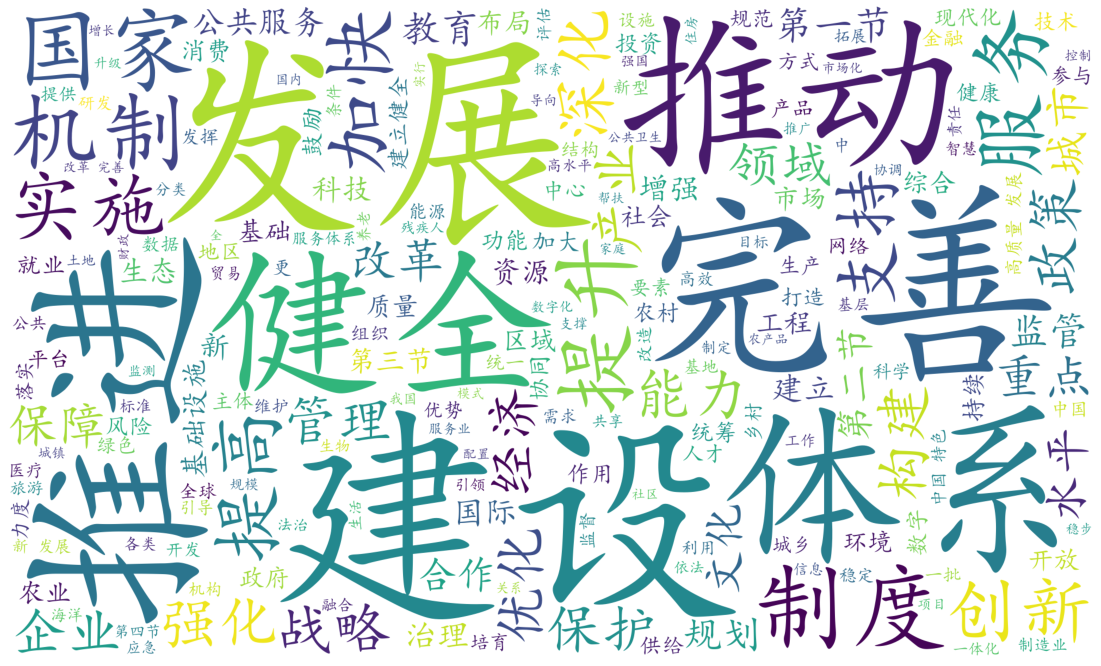

In [99]:
myfont = r'C:\Windows\Fonts\simkai.ttf'
cloudobj = WordCloud(font_path = myfont,
                    width = 2000, height = 1200,
                    mode = "RGBA", 
                    background_color = None,
                    stopwords = stoplist).generate(' '.join(jieba.lcut(use_txt.iloc[0, 0]))) 

plt.figure(figsize = (20, 12))
plt.imshow(cloudobj)
plt.axis("off")
plt.show()